# Bike Sharing Assignment


## Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

* Which variables are significant in predicting the demand for shared bikes.
* How well those variables describe the bike demands
    
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

**Business Goal**:

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

**Data Preparation**:

1. You can observe in the dataset that some of the variables like 'weathersit' and 'season' have values as 1, 2, 3, 4 which have specific labels associated with them (as can be seen in the data dictionary). These numeric values associated with the labels may indicate that there is some order to them - which is actually not the case (Check the data dictionary and think why). So, it is advisable to convert such feature values into categorical string values before proceeding with model building. Please refer the data dictionary to get a better understanding of all the independent variables.
 
2. You might notice the column 'yr' with two values 0 and 1 indicating the years 2018 and 2019 respectively. At the first instinct, you might think it is a good idea to drop this column as it only has two values so it might not be a value-add to the model. But in reality, since these bike-sharing systems are slowly gaining popularity, the demand for these bikes is increasing every year proving that the column 'yr' might be a good variable for prediction. So think twice before dropping it.

**Model Building**:

In the dataset provided, you will notice that there are three columns named 'casual', 'registered', and 'cnt'. The variable 'casual' indicates the number casual users who have made a rental. The variable 'registered' on the other hand shows the total number of registered users who have made a booking on a given day. Finally, the 'cnt' variable indicates the total number of bike rentals, including both casual and registered. **The model should be built taking this 'cnt' as the target variable.**

**Model Evaluation**:

When you're done with model building and residual analysis and have made predictions on the test set, just make sure you use the following two lines of code to calculate the R-squared score on the test set.

        from sklearn.metrics import r2_score
        r2_score(y_test, y_pred)

* where y_test is the test data set for the target variable, and y_pred is the variable containing the predicted values of the target variable on the test set.
* Please don't forget to perform this step as the R-squared score on the test set holds some marks. The variable names inside the 'r2_score' function can be different based on the variable names you have chosen.

## Summary

#### 1. Importing Necessary Library
#### 2. Reading, Understanding and Preparation the Data
        2.1 Reading the dataset
        2.2 Check the head of the dataset
        2.3 Check the shape of the dataset
        2.4 Check the Columns, Dtype, Null etc of the dataset
        2.5 Checking Missing Value
        2.6 Checking duplicates in dataset
        2.7 Shorting columns
        2.8 Removing extra columns, Which are not require
#### Step 3: Data Preparation
        3.1 Converting mnth into a categorical variable like January,February etc
        3.2 Converting weekday into a categorical variable like Monday,Tuesday etc
        3.3 Converting season into a categorical variable according to data dictionary
        3.4 Converting weathersit into a categorical variable according to data dictionary
#### Step 4: Data Visualization EDA
        4.1 Univariate Analysis
            4.1.1 Visualizing distribution of numerical variables
            4.1.2 Visualizing distribution of categorical variables
        4.2 Bivariate Analysis
            4.2.1 Numerical/Quantitative Variables
            4.2.2 Numeric variables (Correlation)
            4.2.3 Categorical Variables
            4.2.4 Categorical Variables (Correlation)
        4.3 Multivariate Analysis
#### Step 5: Creation of Dummy Variables 
#### Step 6: Splitting the Data into Training and Testing Sets
#### Step 7: Scaling the dataset
#### Step 8: Selecting Features using RFE
#### Step 9: Building a linear model
#### Step 10: Residual Analysis of the train data
#### Step 11: Making Predictions Using the Final Model on the Test set
#### Step 12: Model Evaluation




## Step 1: Importing Necessary Library

In [1]:
import calendar
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Regression libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# warnings
import warnings
warnings.filterwarnings(action = 'ignore')

## Step 2: Reading, Understanding and Preparation the Data


### 2.1 Reading the dataset

In [2]:
bike_df = pd.read_csv('day.csv');

### 2.2 Check the head of the dataset

In [3]:
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### 2.3 Check the shape of the dataset

In [4]:
bike_df.shape

(730, 16)

### 2.4 Check the Columns, Dtype, Null etc of the dataset

In [5]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# Check the Mean, Min, Max, Std etc of the dataset
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### 2.5 Checking Missing Value

In [7]:
100*bike_df.isna().mean()

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [8]:
bike_df.isna().sum().sort_values(ascending=False)

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

No null values in dataset

### 2.6 Checking duplicates in dataset

In [9]:
duplicate_df = bike_df.duplicated()
bike_df[duplicate_df]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


In [10]:
bike_df.shape

(730, 16)

no duplicates in the dataset.

### 2.7 Shorting columns

In [11]:
bike_df = bike_df.reindex(sorted(bike_df.columns), axis=1)

In [12]:
bike_df

,atemp,casual,cnt,dteday,holiday,hum,instant,mnth,registered,season,temp,weathersit,weekday,windspeed,workingday,yr
0,18.18125,331,985,01-01-2018,0,80.5833,1,1,654,1,14.110847,2,6,10.749882,0,0
1,17.68695,131,801,02-01-2018,0,69.6087,2,1,670,1,14.902598,2,0,16.652113,0,0
2,9.47025,120,1349,03-01-2018,0,43.7273,3,1,1229,1,8.050924,1,1,16.636703,1,0
3,10.60610,108,1562,04-01-2018,0,59.0435,4,1,1454,1,8.200000,1,2,10.739832,1,0
4,11.46350,82,1600,05-01-2018,0,43.6957,5,1,1518,1,9.305237,1,3,12.522300,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,11.33210,247,2114,27-12-2019,0,65.2917,726,12,1867,1,10.420847,2,4,23.458911,1,1
726,12.75230,644,3095,28-12-2019,0,59.0000,727,12,2451,1,10.386653,2,5,10.416557,1,1
727,12.12000,159,1341,29-12-2019,0,75.2917,728,12,1182,1,10.386653,2,6,8.333661,0,1
728,11.58500,364,1796,30-12-2019,0,48.3333,729,12,1432,1,10.489153,1,0,23.500518,0,1


### 2.8 Removing extra columns, Which are not require

In [13]:
drop_cols = ['casual', 'dteday', 'instant', 'registered']

bike_df.drop(drop_cols, axis = 1, inplace = True)

In [14]:
bike_df.shape

(730, 12)

## Step 3: Data Preparation

### 3.1 Converting mnth into a categorical variable like January,February etc

In [15]:
bike_df['mnth'].value_counts(ascending = False)

mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: count, dtype: int64

In [16]:
bike_df['mnth'] = bike_df['mnth'].apply(lambda x: calendar.month_name[x])

In [17]:
bike_df['mnth'].value_counts(ascending = False)

mnth
January      62
March        62
May          62
July         62
August       62
October      62
December     62
April        60
June         60
September    60
November     60
February     56
Name: count, dtype: int64

### 3.2 Converting weekday into a categorical variable like Monday,Tuesday etc

In [18]:
bike_df['weekday'].value_counts(ascending = False)

weekday
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: count, dtype: int64

In [19]:
bike_df['weekday'] = bike_df['weekday'].apply(lambda x: calendar.day_name[x])

In [20]:
bike_df['weekday'].value_counts(ascending = False)

weekday
Sunday       105
Monday       105
Tuesday      105
Wednesday    104
Friday       104
Saturday     104
Thursday     103
Name: count, dtype: int64

### 3.3 Converting season into a categorical variable according to data dictionary

In [21]:
bike_df['season'].value_counts(ascending = False)

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64

In [22]:
bike_df['season'].replace({ 1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter' }, inplace = True)

In [23]:
bike_df['season'].value_counts(ascending = False)

season
Fall      188
Summer    184
Spring    180
Winter    178
Name: count, dtype: int64

### 3.4 Converting weathersit into a categorical variable according to data dictionary

In [24]:
bike_df['weathersit'].value_counts(ascending = False)

weathersit
1    463
2    246
3     21
Name: count, dtype: int64

In [25]:
bike_df["weathersit"] = bike_df["weathersit"].map({1:'Clear', 2:'Mist/Cloudy', 3:'Light Rain/Snow', 4:'Heavy Rain/Snow'})
                            

In [26]:
bike_df['weathersit'].value_counts(ascending = False)

weathersit
Clear              463
Mist/Cloudy        246
Light Rain/Snow     21
Name: count, dtype: int64

In [27]:
bike_df.head()

,atemp,cnt,holiday,hum,mnth,season,temp,weathersit,weekday,windspeed,workingday,yr
0,18.18125,985,0,80.5833,January,Spring,14.110847,Mist/Cloudy,Sunday,10.749882,0,0
1,17.68695,801,0,69.6087,January,Spring,14.902598,Mist/Cloudy,Monday,16.652113,0,0
2,9.47025,1349,0,43.7273,January,Spring,8.050924,Clear,Tuesday,16.636703,1,0
3,10.60610,1562,0,59.0435,January,Spring,8.200000,Clear,Wednesday,10.739832,1,0
4,11.46350,1600,0,43.6957,January,Spring,9.305237,Clear,Thursday,12.522300,1,0


## Step 4: Data Visualization EDA

### 4.1 Univariate Analysis

#### 4.1.1 Visualizing distribution of numerical variables

In [28]:
quanti_num_cols_weather=["atemp","hum","temp","windspeed"]

Countplot of atemp


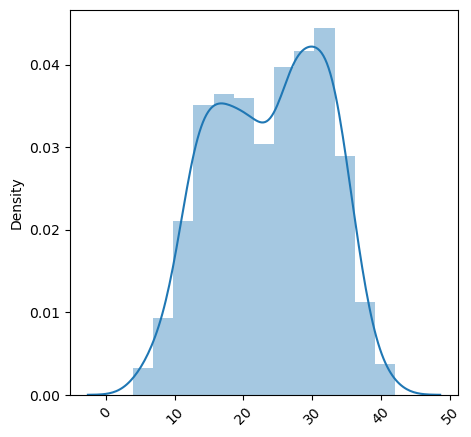

Countplot of hum


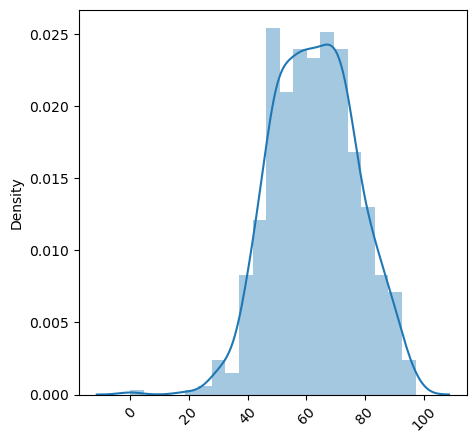

Countplot of temp


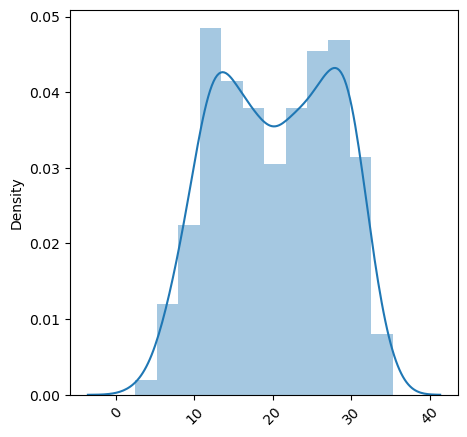

Countplot of windspeed


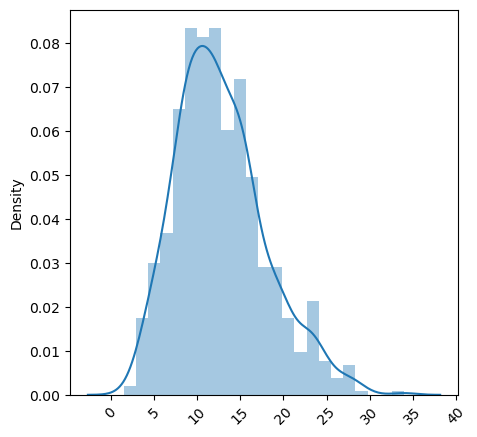

In [29]:
for i in quanti_num_cols_weather:
    print("Countplot of",i)
    plt.figure(figsize = (5,5))
    ax = sns.distplot(x=bike_df[i])
    plt.xticks(rotation=45)
    plt.show()

Countplot of total rantal count


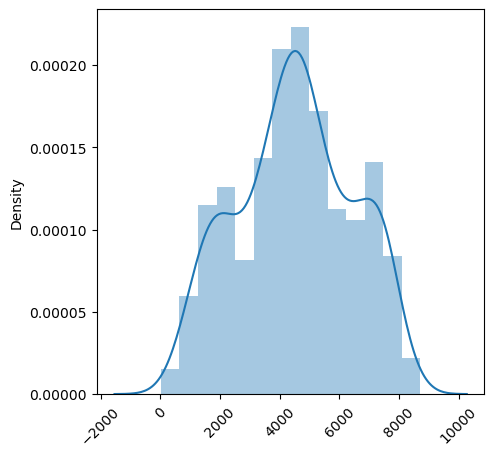

In [30]:
    print("Countplot of total rantal count")
    plt.figure(figsize = (5,5))
    ax = sns.distplot(x=bike_df['cnt'])
    plt.xticks(rotation=45)
    plt.show()

#### 4.1.2 Visualizing distribution of categorical variables

In [31]:
order_cat_cols=["season","yr","mnth","holiday","weekday","workingday","weathersit"]

Countplot of season


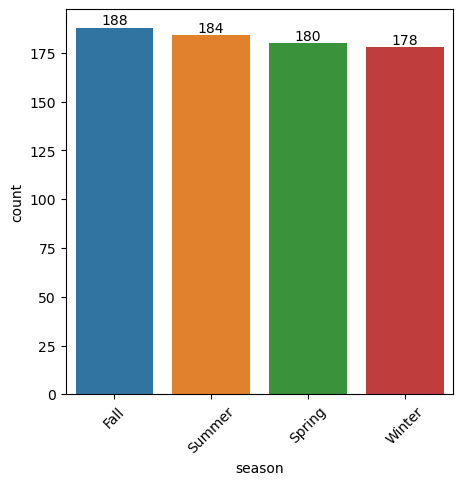

Countplot of yr


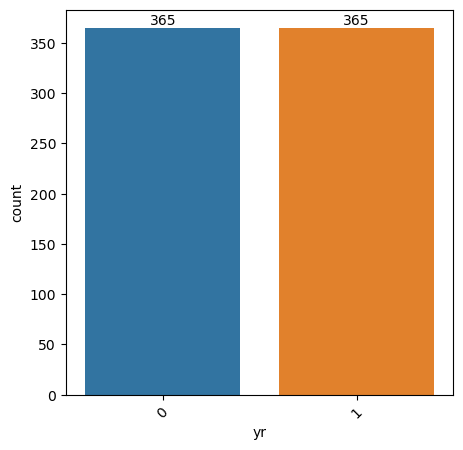

Countplot of mnth


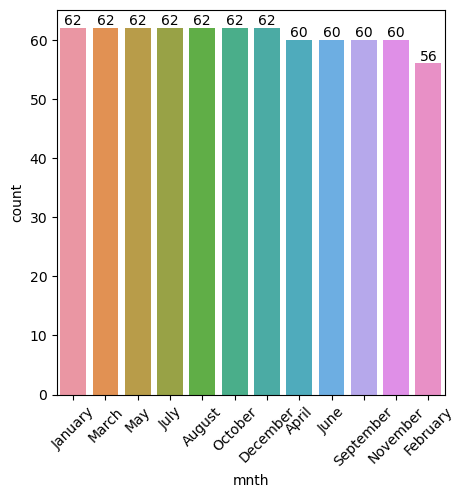

Countplot of holiday


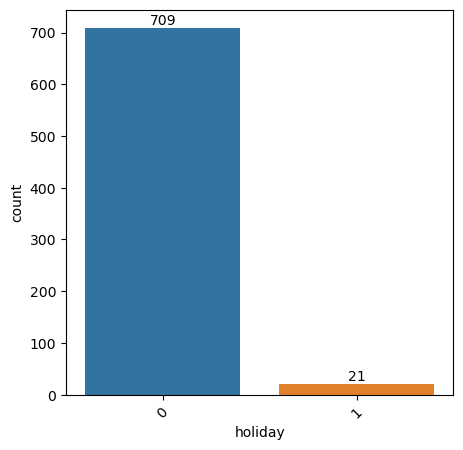

Countplot of weekday


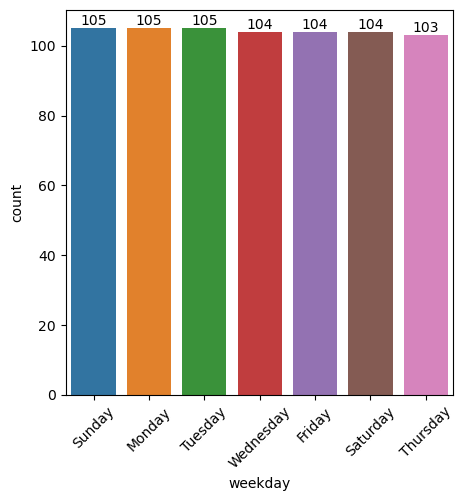

Countplot of workingday


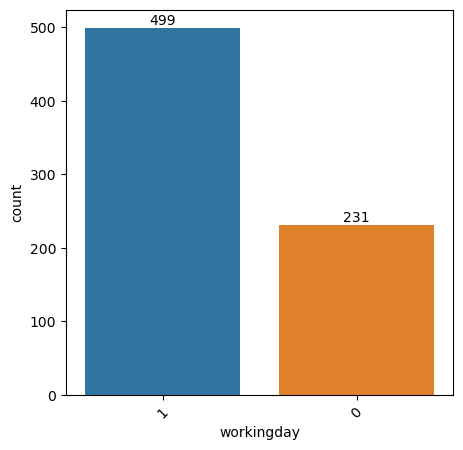

Countplot of weathersit


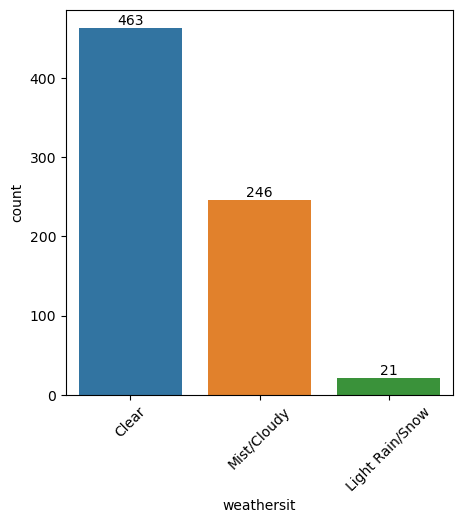

In [32]:
for i in order_cat_cols:
    print("Countplot of",i)
    plt.figure(figsize = (5,5))
    ax = sns.countplot(x=bike_df[i],order = bike_df[i].value_counts(ascending=False).index)
    abs_values = bike_df[i].value_counts(ascending=False).values
    ax.bar_label(container=ax.containers[0], labels=abs_values)
    plt.xticks(rotation=45)
    plt.show()

### 4.2 Bivariate Analysis

#### 4.2.1 Numerical/Quantitative Variables

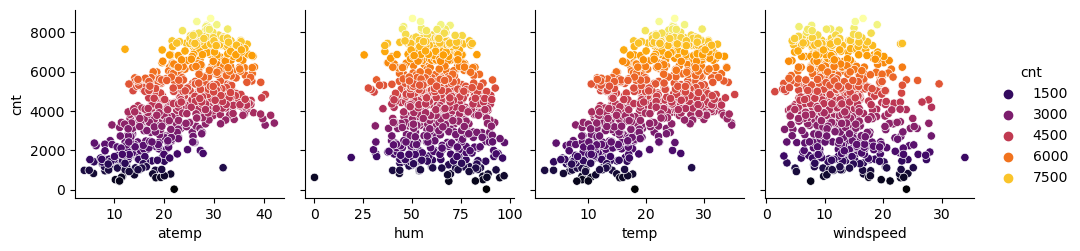

In [33]:
sns.pairplot(
    bike_df,
    x_vars=["atemp","hum","temp","windspeed"],
    y_vars=["cnt"], hue = 'cnt', palette = 'inferno',
)

The graph below shows that the variable "temp" has the strongest correlation with the target variable. Only one of the duplicate variables, "atemp" and "temp," is chosen for determining the best fit line.


#### 4.2.2 Numeric variables (Correlation)

In [34]:
quanti_num_cols_weathercnt=["atemp","hum","temp","windspeed","cnt"]
bike_df[quanti_num_cols_weathercnt].head()

,atemp,hum,temp,windspeed,cnt
0,18.18125,80.5833,14.110847,10.749882,985
1,17.68695,69.6087,14.902598,16.652113,801
2,9.47025,43.7273,8.050924,16.636703,1349
3,10.60610,59.0435,8.200000,10.739832,1562
4,11.46350,43.6957,9.305237,12.522300,1600


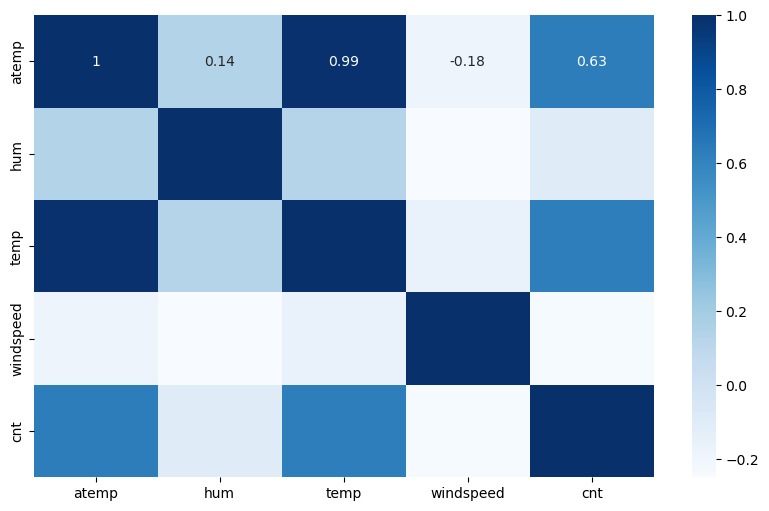

In [35]:
plt.figure(figsize=(10,6))
sns.heatmap(bike_df[quanti_num_cols_weathercnt].corr(),annot=True,cmap="Blues")
plt.show()

#### 4.2.3 Categorical Variables

Boxplot of Cnt Vs season


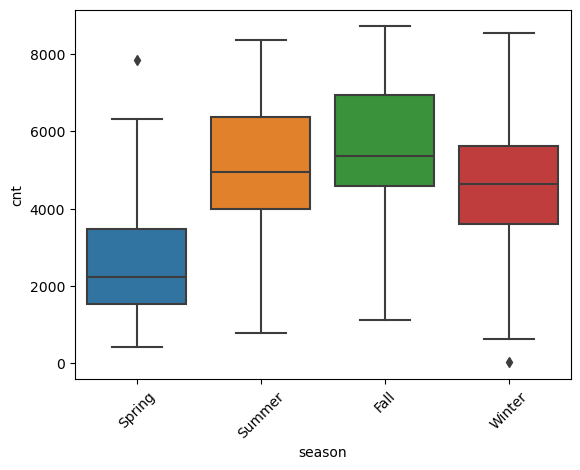

Boxplot of Cnt Vs yr


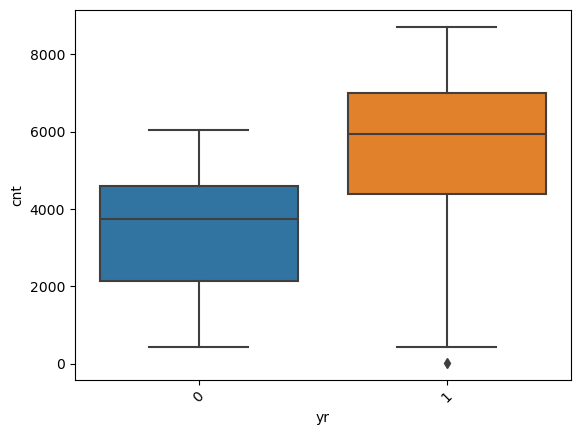

Boxplot of Cnt Vs mnth


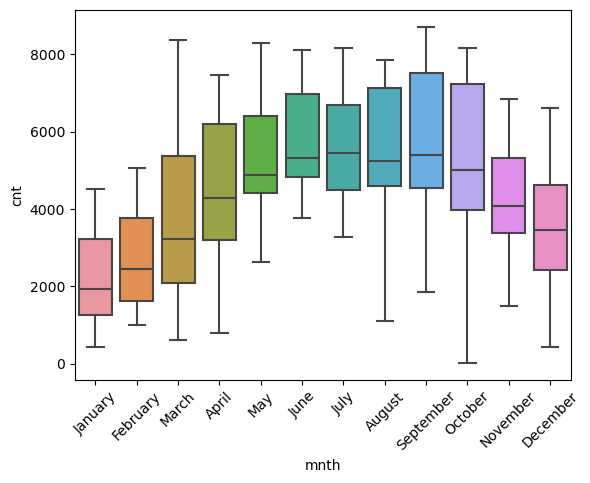

Boxplot of Cnt Vs holiday


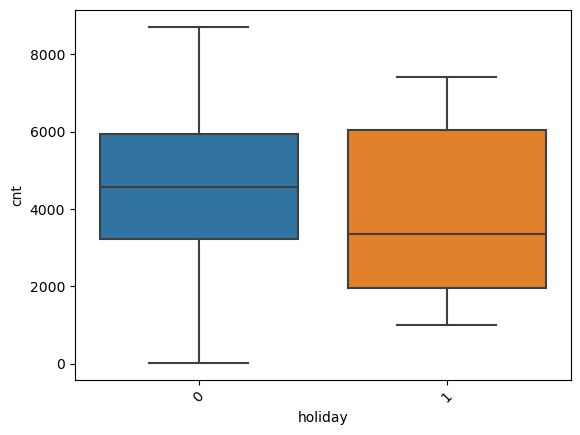

Boxplot of Cnt Vs weekday


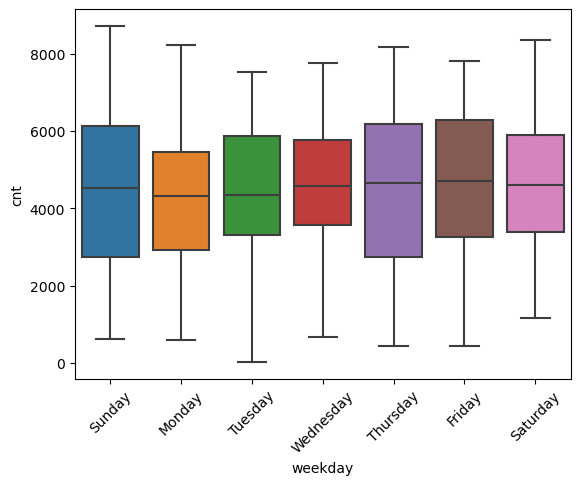

Boxplot of Cnt Vs workingday


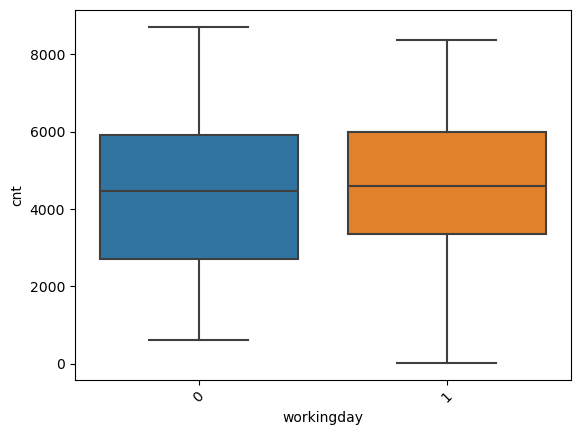

Boxplot of Cnt Vs weathersit


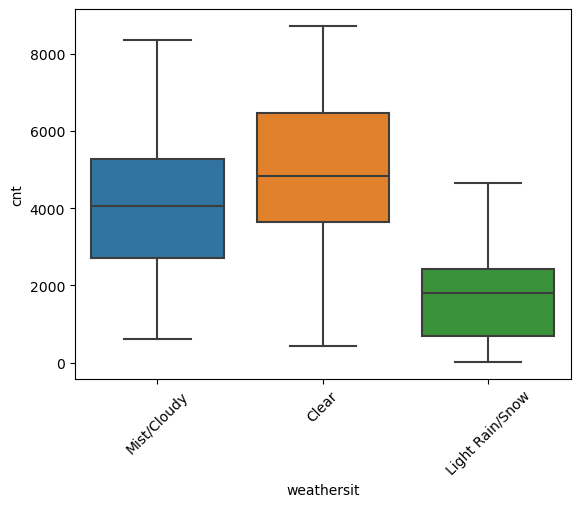

In [36]:
for i in order_cat_cols:
        print("Boxplot of Cnt Vs",i)
        sns.boxplot(x=bike_df[i],y=bike_df['cnt'])
        plt.xticks(rotation=45)
        plt.show()

- There were more reservations made in 2019 than there were in 2018, which suggests that business is positive.
- Bookings for the fall season have increased significantly. In addition, there has been a significant increase in booking counts from 2018 to 2019 in all seasons.
- The number of reservations is typically smaller on non-holiday days, which makes sense given that some people would rather spend the holidays at home with their families.
- It's obvious that having clear whether contributed significantly to the increase in Booking.
- The distribution of bookings between working and non-working days seems to be about equal.
- When it came to Bookings, Thursday, Friday, Saturday, and Sunday were busier than the first few days of the week.
- The months of May, June, July, August, September, and October saw the most bookings. From the start of the year until about midway through, the trend showed an increase, and then near the conclusion of the year, it showed a decline.

#### 4.2.4 Categorical Variables (Correlation)

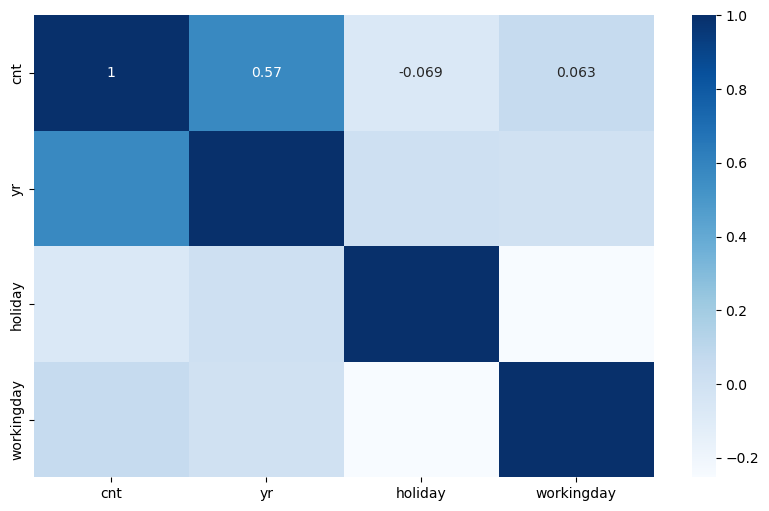

In [37]:
order_cat_colscat=["cnt","yr","holiday","workingday"]
plt.figure(figsize=(10,6))
sns.heatmap(bike_df[order_cat_colscat].corr(numeric_only = True),annot=True,cmap="Blues")
plt.show()

### 4.3 Multivariate Analysis

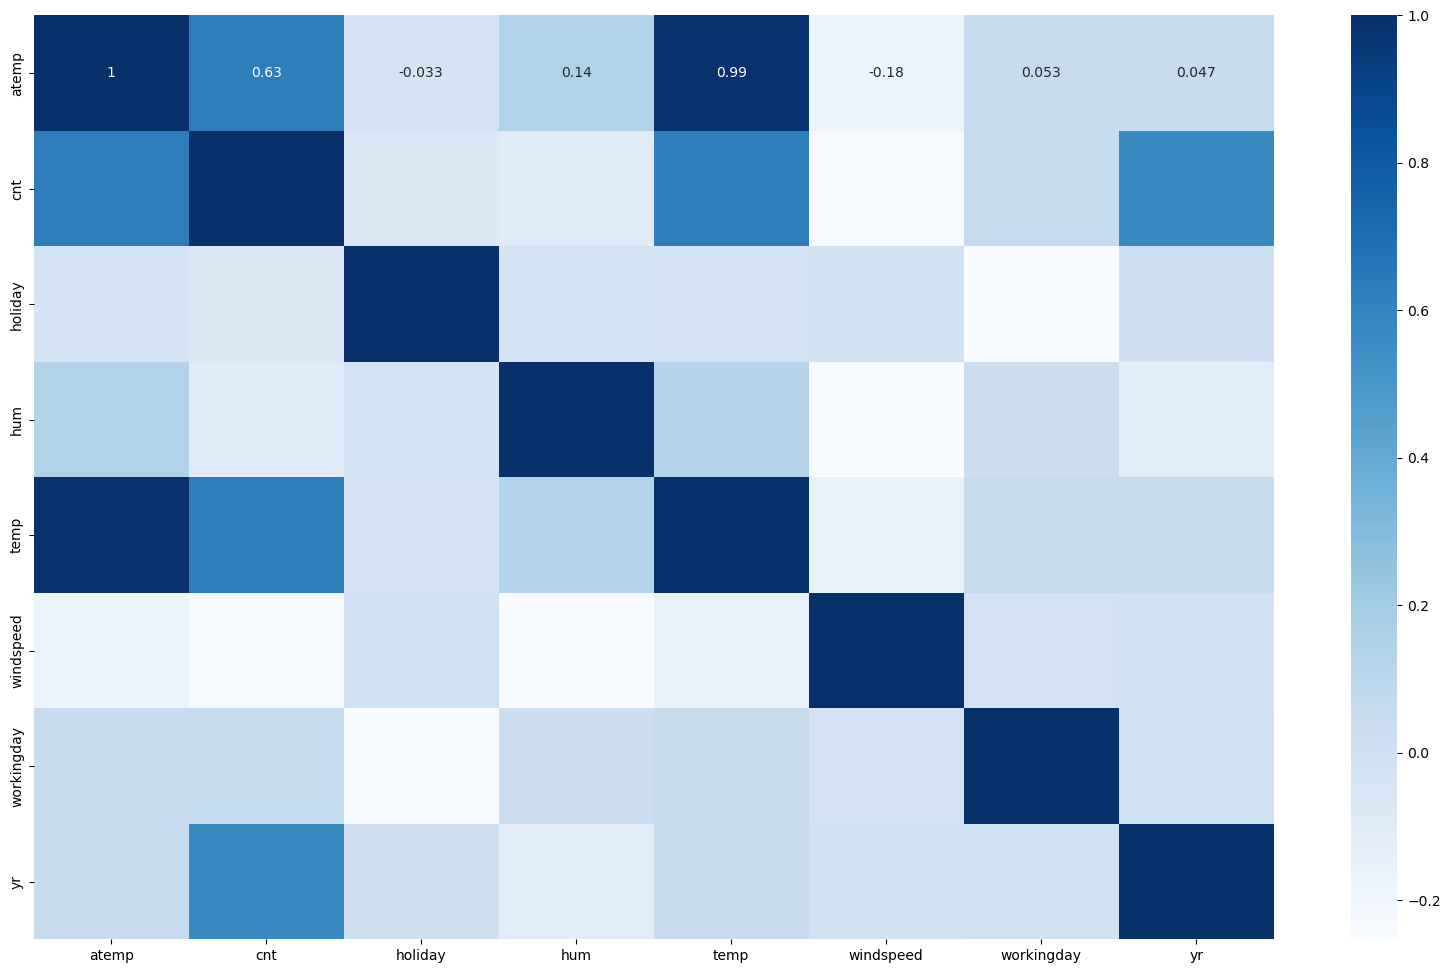

In [38]:
plt.figure(figsize=(20,12))
sns.heatmap(bike_df.corr(numeric_only = True),annot=True,cmap="Blues")
plt.show()

<Figure size 2000x1200 with 0 Axes>

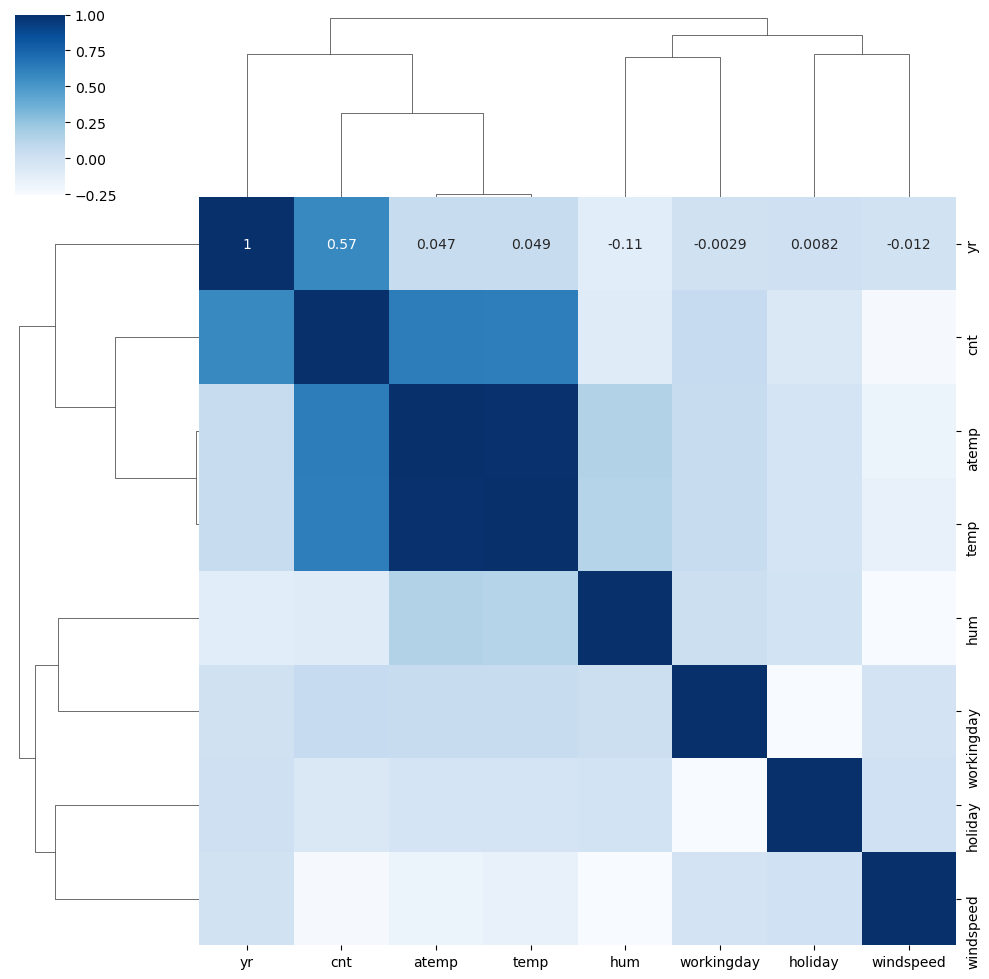

In [39]:
plt.figure(figsize=(20,12))
sns.clustermap(bike_df.corr(numeric_only = True),annot=True,cmap="Blues")
plt.show()

## Step 5: Creation of Dummy Variables 

In [40]:
bike_df.head()

,atemp,cnt,holiday,hum,mnth,season,temp,weathersit,weekday,windspeed,workingday,yr
0,18.18125,985,0,80.5833,January,Spring,14.110847,Mist/Cloudy,Sunday,10.749882,0,0
1,17.68695,801,0,69.6087,January,Spring,14.902598,Mist/Cloudy,Monday,16.652113,0,0
2,9.47025,1349,0,43.7273,January,Spring,8.050924,Clear,Tuesday,16.636703,1,0
3,10.60610,1562,0,59.0435,January,Spring,8.200000,Clear,Wednesday,10.739832,1,0
4,11.46350,1600,0,43.6957,January,Spring,9.305237,Clear,Thursday,12.522300,1,0


In [41]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   atemp       730 non-null    float64
 1   cnt         730 non-null    int64  
 2   holiday     730 non-null    int64  
 3   hum         730 non-null    float64
 4   mnth        730 non-null    object 
 5   season      730 non-null    object 
 6   temp        730 non-null    float64
 7   weathersit  730 non-null    object 
 8   weekday     730 non-null    object 
 9   windspeed   730 non-null    float64
 10  workingday  730 non-null    int64  
 11  yr          730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [42]:
# Creating dummy variables for categorical columns have more then 2 unique values
categorical_cols_dummy = ["season", "mnth", "weekday", "weathersit"]

bike_df[categorical_cols_dummy].nunique()

season         4
mnth          12
weekday        7
weathersit     3
dtype: int64

In [43]:
# Dropping the first column in each dummy category  
# Removing orginal columns ["season", "mnth", "weekday", "weathersit"]
bike_df = pd.get_dummies(data = bike_df, columns = categorical_cols_dummy, drop_first = True)

In [44]:
bike_df.head()

,atemp,cnt,holiday,hum,temp,windspeed,workingday,yr,season_Spring,season_Summer,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Rain/Snow,weathersit_Mist/Cloudy
0,18.18125,985,0,80.5833,14.110847,10.749882,0,0,True,False,...,False,False,False,False,True,False,False,False,False,True
1,17.68695,801,0,69.6087,14.902598,16.652113,0,0,True,False,...,False,False,True,False,False,False,False,False,False,True
2,9.47025,1349,0,43.7273,8.050924,16.636703,1,0,True,False,...,False,False,False,False,False,False,True,False,False,False
3,10.60610,1562,0,59.0435,8.200000,10.739832,1,0,True,False,...,False,False,False,False,False,False,False,True,False,False
4,11.46350,1600,0,43.6957,9.305237,12.522300,1,0,True,False,...,False,False,False,False,False,True,False,False,False,False


In [45]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   atemp                       730 non-null    float64
 1   cnt                         730 non-null    int64  
 2   holiday                     730 non-null    int64  
 3   hum                         730 non-null    float64
 4   temp                        730 non-null    float64
 5   windspeed                   730 non-null    float64
 6   workingday                  730 non-null    int64  
 7   yr                          730 non-null    int64  
 8   season_Spring               730 non-null    bool   
 9   season_Summer               730 non-null    bool   
 10  season_Winter               730 non-null    bool   
 11  mnth_August                 730 non-null    bool   
 12  mnth_December               730 non-null    bool   
 13  mnth_February               730 non

## Step 6: Splitting the Data into Training and Testing Sets

In [46]:
# creating X and y variables
X = bike_df.drop('cnt', axis = 1)
y = bike_df['cnt']

In [47]:
# train-test split of the data set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state = 100)

In [48]:
# Shape of X_train
X_train.shape

(510, 29)

In [49]:
# Shape of y_train
y_train.shape

(510,)

In [50]:
# Shape of X_test
X_test.shape

(219, 29)

In [51]:
# Shape of y_test
y_test.shape

(219,)

## Step 7: Scaling the dataset

In [52]:
scaler = MinMaxScaler()

In [53]:
num_vars = ["temp", "hum", "windspeed"]
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_train.head()

,atemp,holiday,hum,temp,windspeed,workingday,yr,season_Spring,season_Summer,season_Winter,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Rain/Snow,weathersit_Mist/Cloudy
653,23.0423,0,0.575354,0.509887,0.300794,1,1,False,False,True,...,True,False,False,False,False,False,False,True,False,False
576,33.1448,0,0.725633,0.815169,0.264686,1,1,False,False,False,...,False,False,False,False,False,False,False,True,False,False
426,20.6746,0,0.640189,0.442393,0.255342,0,1,True,False,False,...,False,False,False,False,True,False,False,False,False,True
728,11.5850,0,0.498067,0.245101,0.663106,0,1,True,False,False,...,False,False,True,False,False,False,False,False,False,False
482,18.8752,0,0.504508,0.395666,0.188475,0,1,False,True,False,...,False,False,False,False,True,False,False,False,False,True


In [54]:
X_train.describe()

,atemp,holiday,hum,temp,windspeed,workingday,yr
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,23.493909,0.025490,0.650369,0.537262,0.320768,0.676471,0.507843
std,8.090038,0.157763,0.145882,0.225844,0.169797,0.468282,0.500429
min,3.953480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.603063,0.000000,0.538643,0.339853,0.199179,0.000000,0.000000
50%,24.020400,0.000000,0.653714,0.540519,0.296763,1.000000,1.000000
75%,30.177700,0.000000,0.754830,0.735215,0.414447,1.000000,1.000000
max,42.044800,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


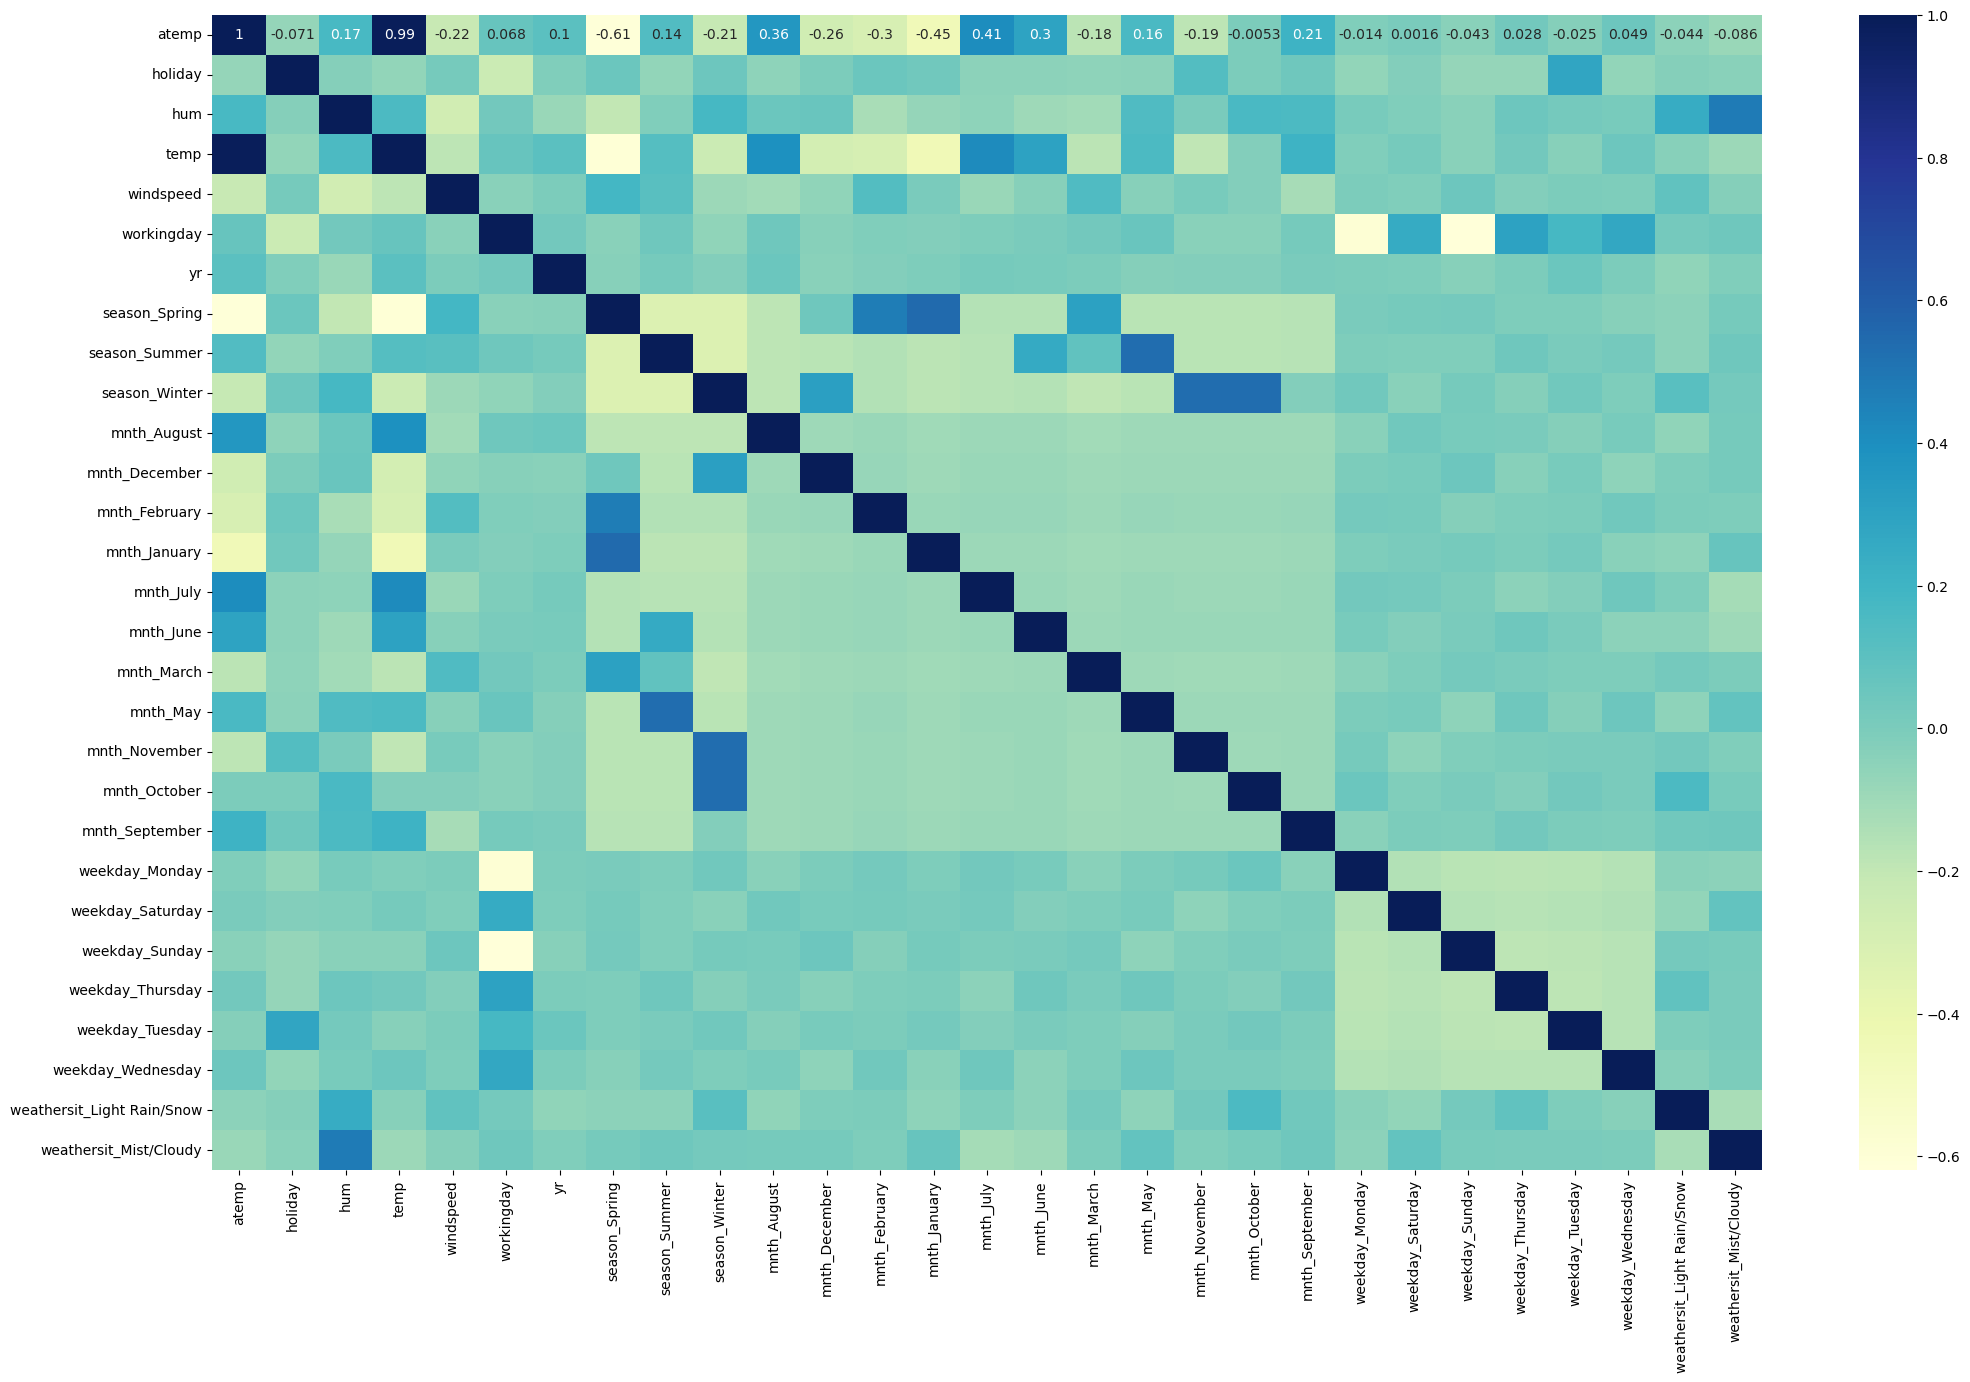

In [55]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25, 15))
sns.heatmap(X_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

## Step 8: Selecting Features using RFE

In [56]:
# Creating and train the model using RFE
lm = LinearRegression()

rfe = RFE(lm, n_features_to_select = 15)

rfe = rfe.fit(X_train, y_train)

In [57]:
rfe.support_

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False,  True,  True, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
        True,  True])

In [58]:
# Feature variable list with corresponding ranks and selection status
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('atemp', False, 14),
 ('holiday', True, 1),
 ('hum', True, 1),
 ('temp', True, 1),
 ('windspeed', True, 1),
 ('workingday', True, 1),
 ('yr', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('mnth_August', False, 6),
 ('mnth_December', False, 3),
 ('mnth_February', False, 4),
 ('mnth_January', True, 1),
 ('mnth_July', True, 1),
 ('mnth_June', False, 13),
 ('mnth_March', False, 15),
 ('mnth_May', False, 5),
 ('mnth_November', False, 2),
 ('mnth_October', False, 10),
 ('mnth_September', True, 1),
 ('weekday_Monday', False, 7),
 ('weekday_Saturday', False, 11),
 ('weekday_Sunday', True, 1),
 ('weekday_Thursday', False, 12),
 ('weekday_Tuesday', False, 8),
 ('weekday_Wednesday', False, 9),
 ('weathersit_Light Rain/Snow', True, 1),
 ('weathersit_Mist/Cloudy', True, 1)]

In [59]:
# Obtain the selected columns using the RFE method.
selected_features = X_train.columns[rfe.support_]

In [60]:
# Confirming the selected column names
selected_features

Index(['holiday', 'hum', 'temp', 'windspeed', 'workingday', 'yr',
       'season_Spring', 'season_Summer', 'season_Winter', 'mnth_January',
       'mnth_July', 'mnth_September', 'weekday_Sunday',
       'weathersit_Light Rain/Snow', 'weathersit_Mist/Cloudy'],
      dtype='object')

In [61]:
# Use the RFE method to obtain the columns that are refused.
rejected_features = X_train.columns[~rfe.support_]

In [62]:
# Confirming the names of the rejected columns
rejected_features

Index(['atemp', 'mnth_August', 'mnth_December', 'mnth_February', 'mnth_June',
       'mnth_March', 'mnth_May', 'mnth_November', 'mnth_October',
       'weekday_Monday', 'weekday_Saturday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday'],
      dtype='object')

## Step 9: Building a linear model


### Using `statsmodels` and `VIF` for manual feature elimination

###### Features that have VIF values greater than 5, p-values greater than 0.05, and statistically insignificant coefficients must be identified for manual feature deletion.

In [63]:
# Method for Building Model
def build_model(X,y):
    X = sm.add_constant(X)
    lm = sm.OLS(y,X.astype(float)).fit()
    print(lm.summary())
    return X

In [64]:
# Method Checking VIF
def checkVIF(X):
    vif = pd.DataFrame()
    X = X.astype(float)
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)


In [65]:
X_train_rfe1 = X_train[selected_features]

In [66]:
# Intial Model with all features
X_train_1 = build_model(X_train_rfe1, y_train)
checkVIF(X_train_1)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Wed, 29 May 2024   Prob (F-statistic):          2.31e-191
Time:                        22:18:30   Log-Likelihood:                -4105.9
No. Observations:                 510   AIC:                             8244.
Df Residuals:                     494   BIC:                             8312.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

,Features,VIF
0,const,84.59
7,season_Spring,5.08
3,temp,3.89
9,season_Winter,3.60
8,season_Summer,2.64
2,hum,1.92
5,workingday,1.88
13,weekday_Sunday,1.78
10,mnth_January,1.57
15,weathersit_Mist/Cloudy,1.57


In [67]:
# Dropping column season_spring and verifying the model with p-value and VIF
X_train_rfe2 = X_train_rfe1.drop(['season_Spring'], axis = 1)
X_train_2 = build_model(X_train_rfe2, y_train)
checkVIF(X_train_2)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     195.3
Date:                Wed, 29 May 2024   Prob (F-statistic):          3.24e-191
Time:                        22:18:31   Log-Likelihood:                -4109.0
No. Observations:                 510   AIC:                             8248.
Df Residuals:                     495   BIC:                             8312.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

,Features,VIF
0,const,57.07
3,temp,2.07
2,hum,1.90
5,workingday,1.88
12,weekday_Sunday,1.78
14,weathersit_Mist/Cloudy,1.56
9,mnth_January,1.55
8,season_Winter,1.53
10,mnth_July,1.43
7,season_Summer,1.41


*Inference*
- All features `p-value` is less than `0.05` and `VIF` is also less than 5 almost equal to 2.
- `R-squared` and `Adj. R-squared` is `84.7%` and `84.2%` which is also very good indicator for a model

Now as you can see, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.

## Step 10: Residual Analysis of the train data


In [68]:
# Predicting y values based on the model for training set
lr_model = sm.OLS(y_train, X_train_2.astype(float)).fit()
y_train_pred = lr_model.predict(X_train_2)
y_train_pred.head()

653    6427.847401
576    6292.858162
426    4582.890522
728    3141.692096
482    5306.507948
dtype: object

Text(0.5, 0, 'Errors')

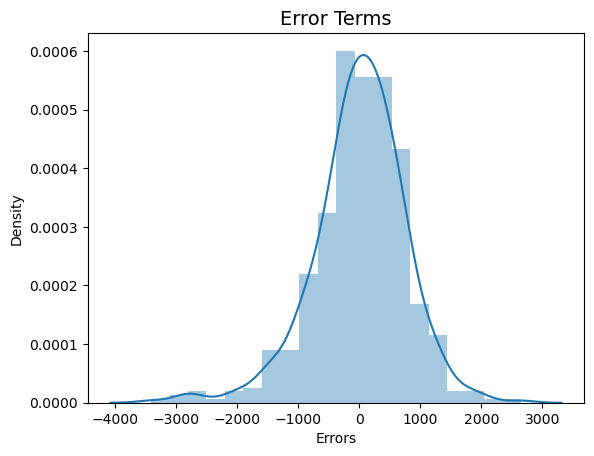

In [69]:
# Plotting the residuals for training set
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins=20)
plt.title("Error Terms", fontsize=14)
plt.xlabel("Errors", fontsize=10)

Inference :

- The training set's error terms are regularly distributed .
- Mean is near to 0, the model has a constant variance i.e. Homoscedasticity.

## Step 11: Making Predictions Using the Final Model on the Test set


In [70]:
X_train_rfe2.head()

,holiday,hum,temp,windspeed,workingday,yr,season_Summer,season_Winter,mnth_January,mnth_July,mnth_September,weekday_Sunday,weathersit_Light Rain/Snow,weathersit_Mist/Cloudy
653,0,0.575354,0.509887,0.300794,1,1,False,True,False,False,False,False,False,False
576,0,0.725633,0.815169,0.264686,1,1,False,False,False,True,False,False,False,False
426,0,0.640189,0.442393,0.255342,0,1,False,False,False,False,False,True,False,True
728,0,0.498067,0.245101,0.663106,0,1,False,False,False,False,False,False,False,False
482,0,0.504508,0.395666,0.188475,0,1,True,False,False,False,False,True,False,True


In [71]:
X_test[num_vars] = scaler.transform(X_test[num_vars])
X_test.head()


,atemp,holiday,hum,temp,windspeed,workingday,yr,season_Spring,season_Summer,season_Winter,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Rain/Snow,weathersit_Mist/Cloudy
184,33.27085,1,0.657364,0.831783,0.084219,0,0,False,False,False,...,False,False,False,False,False,False,True,False,False,True
535,36.04875,0,0.610133,0.901354,0.153728,1,1,False,True,False,...,False,False,False,False,False,True,False,False,False,False
299,22.85230,0,0.837699,0.511964,0.334206,1,0,False,False,True,...,True,False,False,False,False,False,False,False,False,True
221,34.24915,0,0.437098,0.881625,0.339570,1,0,False,False,False,...,False,False,False,False,False,True,False,False,False,False
152,32.19710,0,0.314298,0.817246,0.537414,1,0,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [72]:
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,atemp,holiday,hum,temp,windspeed,workingday,yr,season_Spring,season_Summer,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Rain/Snow,weathersit_Mist/Cloudy
184,1.0,33.27085,1,0.657364,0.831783,0.084219,0,0,False,False,...,False,False,False,False,False,False,True,False,False,True
535,1.0,36.04875,0,0.610133,0.901354,0.153728,1,1,False,True,...,False,False,False,False,False,True,False,False,False,False
299,1.0,22.85230,0,0.837699,0.511964,0.334206,1,0,False,False,...,True,False,False,False,False,False,False,False,False,True
221,1.0,34.24915,0,0.437098,0.881625,0.339570,1,0,False,False,...,False,False,False,False,False,True,False,False,False,False
152,1.0,32.19710,0,0.314298,0.817246,0.537414,1,0,False,True,...,False,False,False,False,False,False,False,False,False,False


In [73]:
# Dropping irrelevant columns in test as per train set model
X_test_sm = X_test_sm.drop(["atemp","season_Spring","mnth_August","mnth_December","mnth_February","mnth_June",
                            "mnth_March","mnth_May","mnth_November","mnth_October","weekday_Monday",
                           "weekday_Saturday","weekday_Thursday","weekday_Tuesday","weekday_Wednesday"], axis=1)
X_test_sm.head()


,const,holiday,hum,temp,windspeed,workingday,yr,season_Summer,season_Winter,mnth_January,mnth_July,mnth_September,weekday_Sunday,weathersit_Light Rain/Snow,weathersit_Mist/Cloudy
184,1.0,1,0.657364,0.831783,0.084219,0,0,False,False,False,True,False,False,False,True
535,1.0,0,0.610133,0.901354,0.153728,1,1,True,False,False,False,False,False,False,False
299,1.0,0,0.837699,0.511964,0.334206,1,0,False,True,False,False,False,False,False,True
221,1.0,0,0.437098,0.881625,0.339570,1,0,False,False,False,False,False,False,False,False
152,1.0,0,0.314298,0.817246,0.537414,1,0,True,False,False,False,False,False,False,False


In [74]:
X_test_sm

,const,holiday,hum,temp,windspeed,workingday,yr,season_Summer,season_Winter,mnth_January,mnth_July,mnth_September,weekday_Sunday,weathersit_Light Rain/Snow,weathersit_Mist/Cloudy
184,1.0,1,0.657364,0.831783,0.084219,0,0,False,False,False,True,False,False,False,True
535,1.0,0,0.610133,0.901354,0.153728,1,1,True,False,False,False,False,False,False,False
299,1.0,0,0.837699,0.511964,0.334206,1,0,False,True,False,False,False,False,False,True
221,1.0,0,0.437098,0.881625,0.339570,1,0,False,False,False,False,False,False,False,False
152,1.0,0,0.314298,0.817246,0.537414,1,0,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,1.0,0,0.708888,0.257562,0.287411,0,1,False,False,False,False,False,False,False,True
702,1.0,0,0.756118,0.519232,0.283397,1,1,False,True,False,False,False,False,False,False
127,1.0,0,0.650923,0.584649,0.069510,0,0,True,False,False,False,False,False,False,False
640,1.0,0,0.817947,0.745598,0.052115,1,1,False,True,False,False,False,False,False,True


In [75]:
# Predicting target variable in test set
y_test_pred = lr_model.predict(X_test_sm)
y_test_pred.head()

184    3395.728272
535    8104.613113
299    3530.276063
221    5300.536663
152    5474.183109
dtype: object

#### Calculating $R^2$ Scores for the test set

In [76]:
print("r2_score for Test Set  : " ,r2_score(y_true=y_test, y_pred=y_test_pred))


r2_score for Test Set  :  0.8045864770086915


## Step 12: Model Evaluation


Text(0, 0.5, 'y_pred')

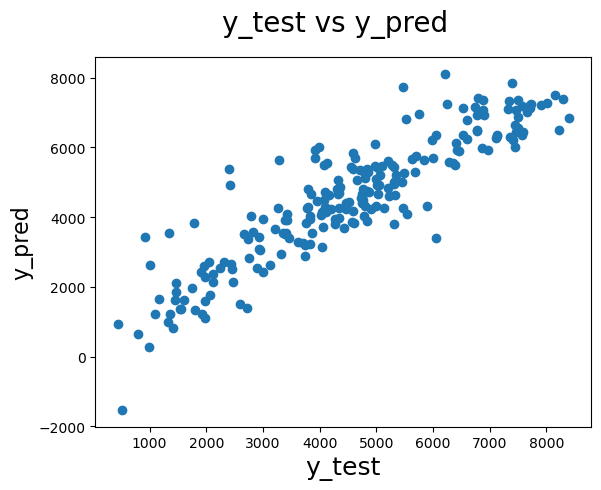

In [77]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 

## Conclusion

- The equation of the best fit line : 
  ***cnt*** = 1763.3081 -521.0958 x holiday -1427.8111 x hum + 4934.2029 x temp -1679.0976 x windspeed + 381.3737 x workingday + 1993.5720 x yr + 648.1735 x season_Summer + 1100.2682 x season_Winter -340.3520 x mnth_January -387.1024 x mnth_July + 804.8554 x mnth_September + 469.5340 x weekday_Sunday -2126.2583 x weathersit_Light Rain/Snow -483.5670 x weathersit_Mist/Cloudy
  
- Effective generalization in a linear regression model is indicated by the close alignment of R2 values (R2: 0.847 vs. 0.804) between the training and test sets. This resemblance indicates that the model is likely to function consistently on fresh, untested data and avoids overfitting to the training set.
- Factors like **year**, **workingday**, **temp**, **hum**, **windspeed**, **summer**, **winter**, **September**, and **Sunday** affect the demand for bikes.
- The greatest coefficient values for three important feature variables—**temp**, **yr**, and **Winter**—indicate their considerable influence.
- For a linear regression model, the RMSE values of the training set and in the test set show that the model fits the training data well and generalizes to new, unknown data with a negligible performance differential between the test and training sets.


## Suggestions

- **Make Use of High-Impact Features:** Pay particular attention to features that have the biggest coefficient values, which indicate a strong impact on bike demand, such as **temp**, **yr**, and **Winter**.

- **Seasonal Strategies:** Create specialized pricing and marketing plans for each season, with a focus on promotions in the **Summer** and **Winter**.

- **Optimize Operational Planning:** Align bike distribution and availability with the key attributes found, maximizing resources during periods of high demand.

- **User Engagement on Weekends:** Take advantage of the extra demand on **Sunday** by planning unique events or promotions to promote riding on the weekends.

- **Weather-Sensitive Promotions:** Adopt weather-specific campaigns or incentives to promote riding during pleasant weather, taking into account the effects of **windspeed**, **hum**, and **temp**.

- **New Market Insights:** Apply the created model to understand the dynamics of demand in the US market, guiding business plans and setting BoomBikes up for competitive advantage.

- **Ongoing Surveillance and Modification:** To guarantee consistent revenue growth, update the model frequently with fresh data and modify tactics in response to changing market circumstances.